In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
from tqdm import tqdm 

# Intraorbital SC
We start considering only the intraorbital SC order parameter in the HF Hamiltonian, so we study
\begin{equation}
H =
\end{equation}

# Parameters definition

In [86]:
t1 = 1.0
t2 = 1.0

def Ek(t, k):
    E = -2*t*(np.cos(k[0]) + np.cos([k[1]]))
    return E

def lamb(Ek, U, J, Del):
    l = np.sqrt( np.square( Ek + (3*U-5*J)/2 ) + np.square(U*Del) )
    return l

def lamb_inter(Ek, U, J, Del):
    l = np.sqrt( np.square( Ek + (3*U-5*J)/2 ) + np.square((U - 2*J)*Del) )
    return l

In [87]:
""" How many k points in the BZ """

grid_kx = np.linspace(-np.pi, np.pi, 50, endpoint = False)
grid_ky = np.linspace(-np.pi, np.pi, 50, endpoint = False)
grid_Ek = np.zeros((len(grid_kx), len(grid_ky)))

energy_Del0 = 0

for (i, kx) in enumerate(grid_kx): 
    for (j, ky) in enumerate(grid_ky):
        k = np.array([kx, ky])
        grid_Ek[i][j] = Ek(t1, k)

In [33]:
U = -3
J = 3/5*U
guess = 0.5
for m in range(20):
    Del = 0.0
    for (i, kx) in enumerate(grid_kx): 
        for (j, ky) in enumerate(grid_ky):
            Del += 1.0/lamb(grid_Ek[i][j], U, J, guess) 
    Del = -0.5*Del*U/np.square(len(grid_kx))*guess
    print(m, Del)
    if(abs(Del - guess) < 1.0E-3):
        energy_Del = 0.0
        for (i, kx) in enumerate(grid_kx): 
            for (j, ky) in enumerate(grid_ky):
                energy_Del += -lamb(grid_Ek[i][j], U, J, Del) 
                energy_Del0 += -lamb(grid_Ek[i][j], U, J, 0) 
                        
        energy_Del = energy_Del/np.square(len(grid_kx)) - U*Del**2.0
        energy_Del0 = energy_Del0/np.square(len(grid_kx))
        if(energy_Del < energy_Del0):
            Del_array[l][s] = Del
        else:
            Del_array[l][s] = 0.0
            
        print(energy_Del0)
        print(energy_Del)
        break
    
    guess = guess*0.5 + Del*0.5

0 0.3557188068274389
1 0.33609514497375226
2 0.3216593773629549
3 0.3111999825659437
4 0.30367418315463646
5 0.2982759368344204
6 0.2944088478059049
7 0.29163998454454304
8 0.2896577242765552
9 0.28823858334180047
10 0.28722252610323823
11 0.28649500987090937
12 0.2859740598247645
13 0.2856010045066873
14 0.28533384601900463
-1.6114971703279324
-1.696244607848507


In [88]:
U_array = np.r_[ -10 : 0.001 : 50j ]
J_array = np.r_[ -10 : 2 : 50j ]

Del_array = np.zeros([len(U_array),len(J_array)])
guess = 0.5
#print(Del_array)
for l in tqdm(range(len(U_array))):
    U = U_array[l]
    for s in range(len(J_array)):
        J = J_array[s]
        for m in range(100):
            Del = 0.0
            for (i, kx) in enumerate(grid_kx): 
                for (j, ky) in enumerate(grid_ky):
                    Del += 1.0/lamb(grid_Ek[i][j], U, J, guess) 
            Del = -0.5*Del*U/np.square(len(grid_kx))*guess
            #print(m, Del)
            if(abs(Del - guess) < 1.0E-4):
                energy_Del = 0.0
                energy_Del0 = 0.0
                for (i, kx) in enumerate(grid_kx): 
                    for (j, ky) in enumerate(grid_ky):
                        energy_Del += -lamb(grid_Ek[i][j], U, J, Del) 
                        energy_Del0 += -lamb(grid_Ek[i][j], U, J, 0) 
                        
                energy_Del = energy_Del/np.square(len(grid_kx)) - U*Del**2.0
                energy_Del0 = energy_Del0/np.square(len(grid_kx))
                if(energy_Del < energy_Del0):
                    Del_array[l][s] = Del
                else:
                    Del_array[l][s] = 0.0
                break
            guess = guess*0.5 + Del*0.5
#print(Del_array)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [08:46<00:00, 10.53s/it]


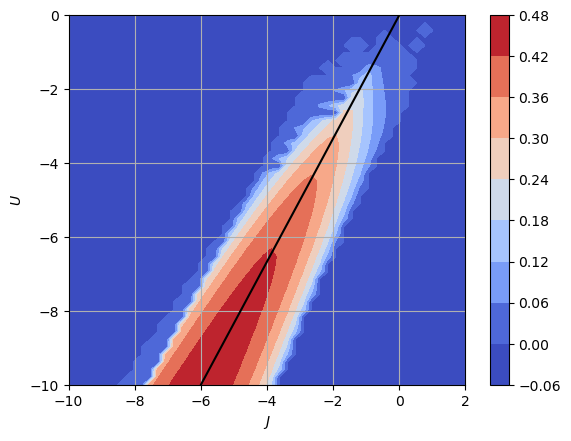

In [97]:
"""Plot of the order parameter"""
cmaps = ['viridis', 'coolwarm']
U_array = np.r_[ -10 : 0.001 : 50j ]
J_array = np.r_[ -10 : 2 : 50j ]

plt.figure()

vmin_Del, vmax_Del = np.min(Del_array), np.max(Del_array)
#vmin_Del, vmax_Del = 0.0, 0.5
#plt.pcolormesh(J_array, U_array, Del_array , cmap=cmaps[1], vmin=vmin_Del, vmax=vmax_Del)
plt.contourf(J_array, U_array, Del_array, cmap=cmaps[1], vmin=vmin_Del, vmax=vmax_Del)
plt.colorbar()
plt.title(r'')
plt.grid()
plt.xlim([-10,2])
plt.ylim([-10,0])
plt.xlabel(r'$J$')
plt.ylabel(r'$U$')
y = 5/3*J_array
plt.plot(J_array, y, '-', color = 'black')
plt.show()

# Inter-orbital SC

In [65]:
U = -3
J = 3/5*U
guess = 0.5
for m in range(20):
    Del = 0.0
    for (i, kx) in enumerate(grid_kx): 
        for (j, ky) in enumerate(grid_ky):
            Del += 1.0/lamb_inter(grid_Ek[i][j], U, J, guess) 
    Del = -0.5*Del*(U-2*J)/np.square(len(grid_kx))*guess
    print(m, Del)
    if(abs(Del - guess) < 1.0E-3):
        energy_Del = 0.0
        for (i, kx) in enumerate(grid_kx): 
            for (j, ky) in enumerate(grid_ky):
                energy_Del += -lamb_inter(grid_Ek[i][j], U, J, Del) 
                energy_Del0 += -lamb_inter(grid_Ek[i][j], U, J, 0) 
                        
        energy_Del = energy_Del/np.square(len(grid_kx)) - U*Del**2.0
        energy_Del0 = energy_Del0/np.square(len(grid_kx))
        if(energy_Del < energy_Del0):
            Del_array[l][s] = Del
        else:
            Del_array[l][s] = 0.0
            
        print(energy_Del0)
        print(energy_Del)
        break
    if(m==19):
        Del = 0.0
    
    guess = guess*0.5 + Del*0.5

0 -0.1670913082229009
1 -0.0954006193087346
2 -0.05848161322443567
3 0.05106438345301221
4 -0.053640276530525804
5 0.05275224497688826
6 -0.053059010998779375
7 0.052953120988067794
8 -0.05298968162691269
9 0.05297705946261804
10 -0.05298141726173714
11 0.052979912748619164
12 -0.05298043217779534
13 0.05298025284647222
14 -0.05298031476008604
15 0.052980293384595624
16 -0.05298030076442041
17 0.05298029821655775
18 -0.05298029909619979
19 0.05298029879250596


In [90]:
U_array = np.r_[ -10 : 10 : 10j ]
J_array = np.r_[ -10 : 10 : 10j ]

Del_inter_array = np.zeros([len(U_array),len(J_array)])
guess = 0.5
#print(Del_array)
for l in tqdm(range(len(U_array))):
    U = U_array[l]
    for s in range(len(J_array)):
        J = J_array[s]
        for m in range(20):
            Del = 0.0
            for (i, kx) in enumerate(grid_kx): 
                for (j, ky) in enumerate(grid_ky):
                    Del += 1.0/lamb_inter(grid_Ek[i][j], U, J, guess) 
            Del = -0.5*Del*(U-2*J)/np.square(len(grid_kx))*guess
            
            if(abs(Del - guess) < 1.0E-5):
                energy_Del = 0.0
                energy_Del0 = 0.0
                for (i, kx) in enumerate(grid_kx): 
                    for (j, ky) in enumerate(grid_ky):
                        energy_Del += -lamb_inter(grid_Ek[i][j], U, J, Del) 
                        energy_Del0 += -lamb_inter(grid_Ek[i][j], U, J, 0) 
                        
                energy_Del = energy_Del/np.square(len(grid_kx)) - (U-2*J)*Del**2.0
                energy_Del0 = energy_Del0/np.square(len(grid_kx))
                if(energy_Del < energy_Del0):
                    Del_inter_array[l][s] = Del
                else:
                    Del_inter_array[l][s] = 0.0
                break
            guess = guess*0.5 + Del*0.5
#print(Del_array)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.02it/s]


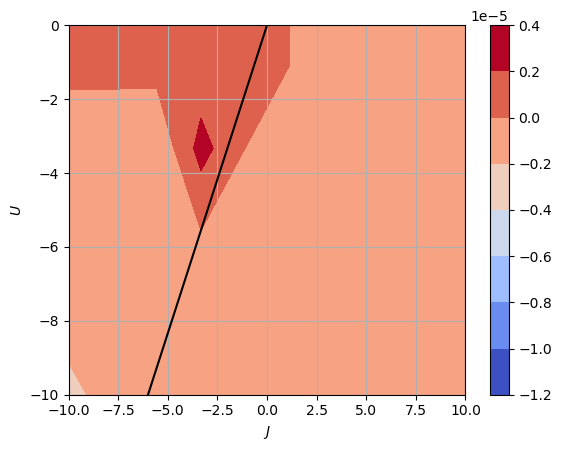

In [91]:
"""Plot of the order parameter"""
cmaps = ['viridis', 'coolwarm']

plt.figure()

vmin_Del, vmax_Del = np.min(Del_inter_array), np.max(Del_inter_array)
#plt.pcolormesh(J_array, U_array, Del_array , cmap=cmaps[1], vmin=vmin_Del, vmax=vmax_Del)
plt.contourf(J_array, U_array, Del_inter_array, cmap=cmaps[1], vmin=vmin_Del, vmax=vmax_Del)
plt.colorbar()
plt.title(r'')
plt.grid()
plt.xlim([-10,10])
plt.ylim([-10,0])
plt.xlabel(r'$J$')
plt.ylabel(r'$U$')
y = 5/3*J_array
plt.plot(J_array, y, '-', color = 'black')
plt.show()